<a href="https://colab.research.google.com/github/zanzivyr/Tactile-Sensor/blob/main/Tactile_Sensor_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tactile Sensor: Visualization

## Import Necessary Libraries

In [ ]:
# Import the necessary libraries
import ipywidgets as widgets
from google.colab.output import eval_js
from PIL import Image
from IPython.display import clear_output 
import torch
from torch import nn
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

## Object Detection

In [ ]:
model_detect = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/Tactile Sensor/model.pt') 
images = [
    "/content/drive/MyDrive/Tactile Sensor/images/1.png",
    "/content/drive/MyDrive/Tactile Sensor/images/2.png",
    "/content/drive/MyDrive/Tactile Sensor/images/3.png",
    "/content/drive/MyDrive/Tactile Sensor/images/4.png",
    "/content/drive/MyDrive/Tactile Sensor/images/5.png",
    "/content/drive/MyDrive/Tactile Sensor/images/6.png",
    "/content/drive/MyDrive/Tactile Sensor/images/7.png",
    "/content/drive/MyDrive/Tactile Sensor/images/8.png",
]
results = model_detect(images)

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-9 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Reshape Data

In [ ]:
img=Image.open(images[0])
w,h=img.size
xorigin, yorigin = w/2, h/2
xorigin, yorigin

data = np.array(results.pandas().xyxy)
df = pd.DataFrame({
    'xmin': data[:, 0, 0], 
    'ymin': data[:, 0, 1], 
    'xmax': data[:, 0, 2], 
    'ymax': data[:, 0, 3], 
    'confidence': data[:, 0, 4], 
    'class': data[:, 0, 5], 
    'name': data[:, 0, 6]
})
df = df[['xmin','ymin','xmax','ymax']]
df['xcenter'] = df['xmax'] - df['xmin']
df['ycenter'] = df['ymax'] - df['ymin']
df['area'] = df['xcenter'] * df['ycenter']
df['distance'] = ((xorigin - df['xcenter'])**2 - (yorigin - df['ycenter'])**2) ** 0.5

df['angle'] = ((df['xcenter'] - 1) / df['distance'])
df['angle'] = df['angle'].apply(lambda x: np.arccos(x) * 180 / 3.1415 )

df

,xmin,ymin,xmax,ymax,xcenter,ycenter,area,distance,angle
0,906.650574,215.124802,1126.824951,526.016357,220.174377,310.891556,68450.354747,416.943538,58.288414
1,1074.559326,195.01207,1277.986816,548.637146,203.42749,353.625076,71937.061754,436.525963,62.374178
2,570.556641,111.673828,754.431519,240.853943,183.874878,129.180115,23752.97783,393.411118,62.301698
3,538.139771,21.461487,760.539429,185.778992,222.399658,164.317505,36544.156923,368.915175,53.121854
4,534.045471,0.0,737.378601,114.226532,203.33313,114.226532,23226.038264,360.934008,55.905588
5,494.853088,436.521332,641.529846,586.613525,146.676758,150.092194,22015.036331,446.437604,70.957173
6,429.716675,460.232574,613.557495,668.624878,183.84082,208.392303,38311.012016,430.228199,64.852156
7,378.069458,517.873352,594.305969,720.0,216.236511,202.126648,43707.161179,393.257548,56.818539


## Training Values

In [ ]:
mean = {
  'xmin': 615.8238754272461,
  'ymin': 244.73744773864746,
  'xmax': 813.3193283081055,
  'ymax': 448.84392738342285,
  'xcenter': 197.49545288085938,
  'ycenter': 204.1064796447754,
  'area': 40992.97557685175,
  'distance': 405.8316376259497,
  'angle': 60.57745087023986,
  'depth': 2.125
}

std = {
  'xmin': 243.65872423297344,
  'ymin': 203.05753647028646,
  'xmax': 251.73838345271653,
  'ymax': 233.34701680277556,
  'xcenter': 25.381534760922136,
  'ycenter': 86.16781927313689,
  'area': 19708.02440038967,
  'distance': 31.624213312428132,
  'angle': 5.719562957988278,
  'depth': 0.8345229603962802
}

In [ ]:
# Load the model
model_depth = torch.load('/content/drive/MyDrive/Tactile Sensor/dnn_model.pt')

## Get Inference

In [ ]:
# Data that affects the number of lemons sold in one day
idx = 7
sample = {
    'xmin': df['xmin'][idx],
    'ymin': df['ymin'][idx],
    'xmax': df['xmax'][idx],
    'ymax': df['ymax'][idx],
    'xcenter': df['xcenter'][idx],
    'ycenter': df['ycenter'][idx],
    'area': df['area'][idx],
    'distance': df['distance'][idx],
    'angle': df['angle'][idx],
}
data = {
    'xmin': df['xmin'][idx],
    'ymin': df['ymin'][idx],
    'xmax': df['xmax'][idx],
    'ymax': df['ymax'][idx],
    'xcenter': df['xcenter'][idx],
    'ycenter': df['ycenter'][idx],
    'area': df['area'][idx],
    'distance': df['distance'][idx],
    'angle': df['angle'][idx],
}

# Normalize our inputs using the same values for our training
sample['xmin']     = (sample['xmin']     - mean['xmin']    ) / std['xmin']    
sample['ymin']     = (sample['ymin']     - mean['ymin']    ) / std['ymin']    
sample['xmax']     = (sample['xmax']     - mean['xmax']    ) / std['xmax']    
sample['ymax']     = (sample['ymax']     - mean['ymax']    ) / std['ymax']    
sample['xcenter']  = (sample['xcenter']  - mean['xcenter'] ) / std['xcenter'] 
sample['ycenter']  = (sample['ycenter']  - mean['ycenter'] ) / std['ycenter'] 
sample['area']     = (sample['area']     - mean['area']    ) / std['area']    
sample['distance'] = (sample['distance'] - mean['distance']) / std['distance']
sample['angle']    = (sample['angle']    - mean['angle']   ) / std['angle']

# Use the CPU as we just need to do a single pass
model_depth.to('cpu')

# Create our input tensor
x1 = torch.tensor(list(sample.values()), dtype=float)

# Pass the input into the neural network
y1 = model_depth(x1.float())

# Un-normalize our output y1
data['depth'] = y1*std['depth']+mean['depth']
data['depth'] = data['depth'].item()

data

{'xmin': 378.0694580078125,
 'ymin': 517.8733520507812,
 'xmax': 594.3059692382812,
 'ymax': 720.0,
 'xcenter': 216.23651123046875,
 'ycenter': 202.12664794921875,
 'area': 43707.16117924824,
 'distance': 393.2575480856976,
 'angle': 56.818539027234884,
 'depth': 3.361517906188965}

## Unwrap Cone and Place Deformation on 2D Plane

In [ ]:
# cone dimensions (mm)
h = 80 # height
d1 = 40 # diameter top
d2 = 60 # diameter bottom

phi = math.atan(0.5*(d2-d1)/h) # pitch of cone
trunc = 0.5*d1/math.tan(phi) # truncated section hypotenuse

pi = math.pi
s1 = 2 * pi * (d1/2) # circumference top
s2 = 2 * pi * (d2/2) # circumference bottom

g = math.sqrt(h**2 + (0.5*(d2-d1))**2) # seam length
gfull = g + trunc # full seam length including truncated section

stotal = 2 * pi * gfull # circumference given gfull as radius
theta = 360 * s2 / stotal # unrolled angle

# photo dimensions (pixels)
d3 = 280 # diameter top
d4 = 1280 # diameter bottom

psi = data['angle'] * theta/360 # angle of deformation
x = data['distance'] * d2/d4 # real x distance from center to deformation
gprime = ((d1/2) - x) / math.sin(phi) # distance from deformation to bottom circle along seam

hdef = trunc + (g - gprime) # unrolled distance from cone top to deformation

# 2D Visualization

Deformation Depth:  3.361517906188965 mm


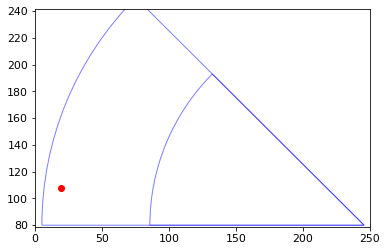

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import math

# Set up the figure and axes
fig, ax = plt.subplots()

# Set the axis to be equal (so the resulting figure is a true representation of the cone)
ax.axis('equal')

# Set the limits of the x and y axes
ax.set(xlim=[0, 250], ylim=[0, 320])

wedge_center = gfull
xcenter = wedge_center +5
ycenter = 80

# Create the Wedge patch
we = Wedge((xcenter, ycenter), wedge_center, 180-theta, 180, 
           edgecolor='b', facecolor='none', alpha=0.5)

# Add the Wedge patch to the Axes
ax.add_artist(we)

# To create a truncated cone, you can add an additional Wedge patch with the same center
# and angle span, but with a smaller radius. The following code creates a truncated cone
# by setting the radius of the second Wedge patch to 5
we2 = Wedge((xcenter, ycenter), trunc, 180-theta, 180, 
            edgecolor='b', facecolor='none', alpha=0.5)
ax.add_artist(we2)

# Add a red dot at the center of the Wedge patch
xpoint = xcenter - hdef*math.cos(psi*pi/180)
ypoint = ycenter + hdef*math.sin(psi*pi/180)

ax.plot(xpoint, ypoint, 'ro')

# Display the figure
plt.show()

# Deformation Depth
print("Deformation Depth: ", data['depth'], "mm")

This functions as a proof of concept. The pipeline is complete through this notebook. There are still tasks to be done:

1.   Allow video predictions and visualizations
2.   Allow streaming video
3.   2D Heatmap visualization
4.   3D visualization

